In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [16]:
data= pd.read_csv('C:/Users/0JIT0S/OneDrive/Escritorio/framingham.csv')

In [5]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [17]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]  

In [18]:
print(data.head())

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

In [33]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB
None


In [34]:
mean_age = data['age'].mean()
print("Media de edad:", mean_age)

Media de edad: 49.58494572911751


In [36]:
filtered_data = data[data['BMI'] > 30.0]
print("Datos filtrados:")
print(filtered_data.head())

Datos filtrados:
    male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
5      0   43        2.0              0         0.0     0.0                0   
6      0   63        1.0              0         0.0     0.0                0   
13     0   41        3.0              0         0.0     1.0                0   
22     0   52        1.0              0         0.0     0.0                0   
28     0   61        3.0              0         0.0     0.0                0   

    prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
5              1         0    228.0  180.0  110.0  30.30       77.0     99.0   
6              0         0    205.0  138.0   71.0  33.11       60.0     85.0   
13             1         0    332.0  124.0   88.0  31.31       65.0     84.0   
22             0         0    234.0  148.0   78.0  34.17       70.0    113.0   
28             1         0    272.0  182.0  121.0  32.80       85.0     65.0   

    TenYearCHD  
5   

In [38]:
data[['age','BMI']].head()

,age,BMI
0,39,26.97
1,46,28.73
2,48,25.34
3,61,28.58
4,46,23.10


<Axes: xlabel='age', ylabel='BMI'>

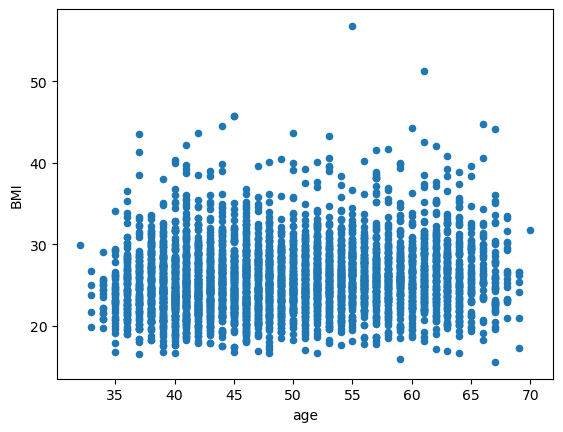

In [40]:
data[['age','BMI']].plot.scatter(x='age',y='BMI')

In [41]:
w = 0.09
b = -3.6

In [44]:
x = np.linspace(0,data['age'].max(),100)
y = 1/(1+np.exp(-(w*x+b)))

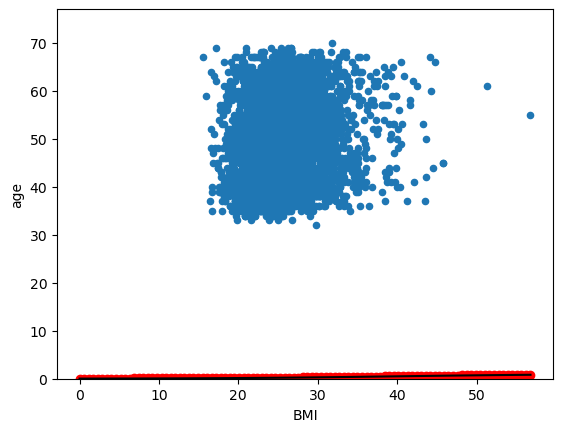

In [52]:
data.plot.scatter(x='BMI',y='age')
plt.plot(x, y, color='black')
plt.ylim(0,data['age'].max()*1.1)
plt.scatter(x, y, color='red')
plt.xlabel('BMI')
plt.ylabel('age')
plt.show()